In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tools.clusterfit as cf
plt.style.use('nice.mplstyle')

In [2]:
def sample_key_name(key):
    if key == 'LX':
        return cf.COLUMNS['LX']
    elif key == 'T':
        return cf.COLUMNS['T']
    elif key == 'Mgas':
        return cf.COLUMNS['M']
    elif key == 'YSZ':
        return cf.COLUMNS['YSZ']
    else:
        return key

# T relations for A

<>:53: SyntaxWarning: invalid escape sequence '\,'
<>:53: SyntaxWarning: invalid escape sequence '\,'
/var/folders/dq/8n0_5l_14xq0nmzxn5gpnp040000gn/T/ipykernel_20087/1923792224.py:53: SyntaxWarning: invalid escape sequence '\,'
  labels = ['$L_\\mathrm{{X}}\,\\mathrm{{(erg \\cdot s^{{-1}})}}$',


LX-T : direction (-144, 8), opposite (36, -8)
A_all=1.521
pscat=[0.07]
nscat=[0.075]
LX positive dipole: 1.5401808632660514e+44, negative dipole: 1.5478753217382015e+44
T positive dipole: 3.3482588935233144, negative dipole: 3.427444060228132
YSZ positive dipole: 33.69080798277566, negative dipole: 35.93476885461527
Mgas positive dipole: 31427017653636.363, negative dipole: 32076395913207.547
Lcore/Ltot positive dipole: 0.3250999786307426, negative dipole: 0.3301707421048896
logFlux positive dipole: -10.989942781069347, negative dipole: -10.975671088185878
ObservedRedshift positive dipole: 0.0753611807394756, negative dipole: 0.07482391008549741


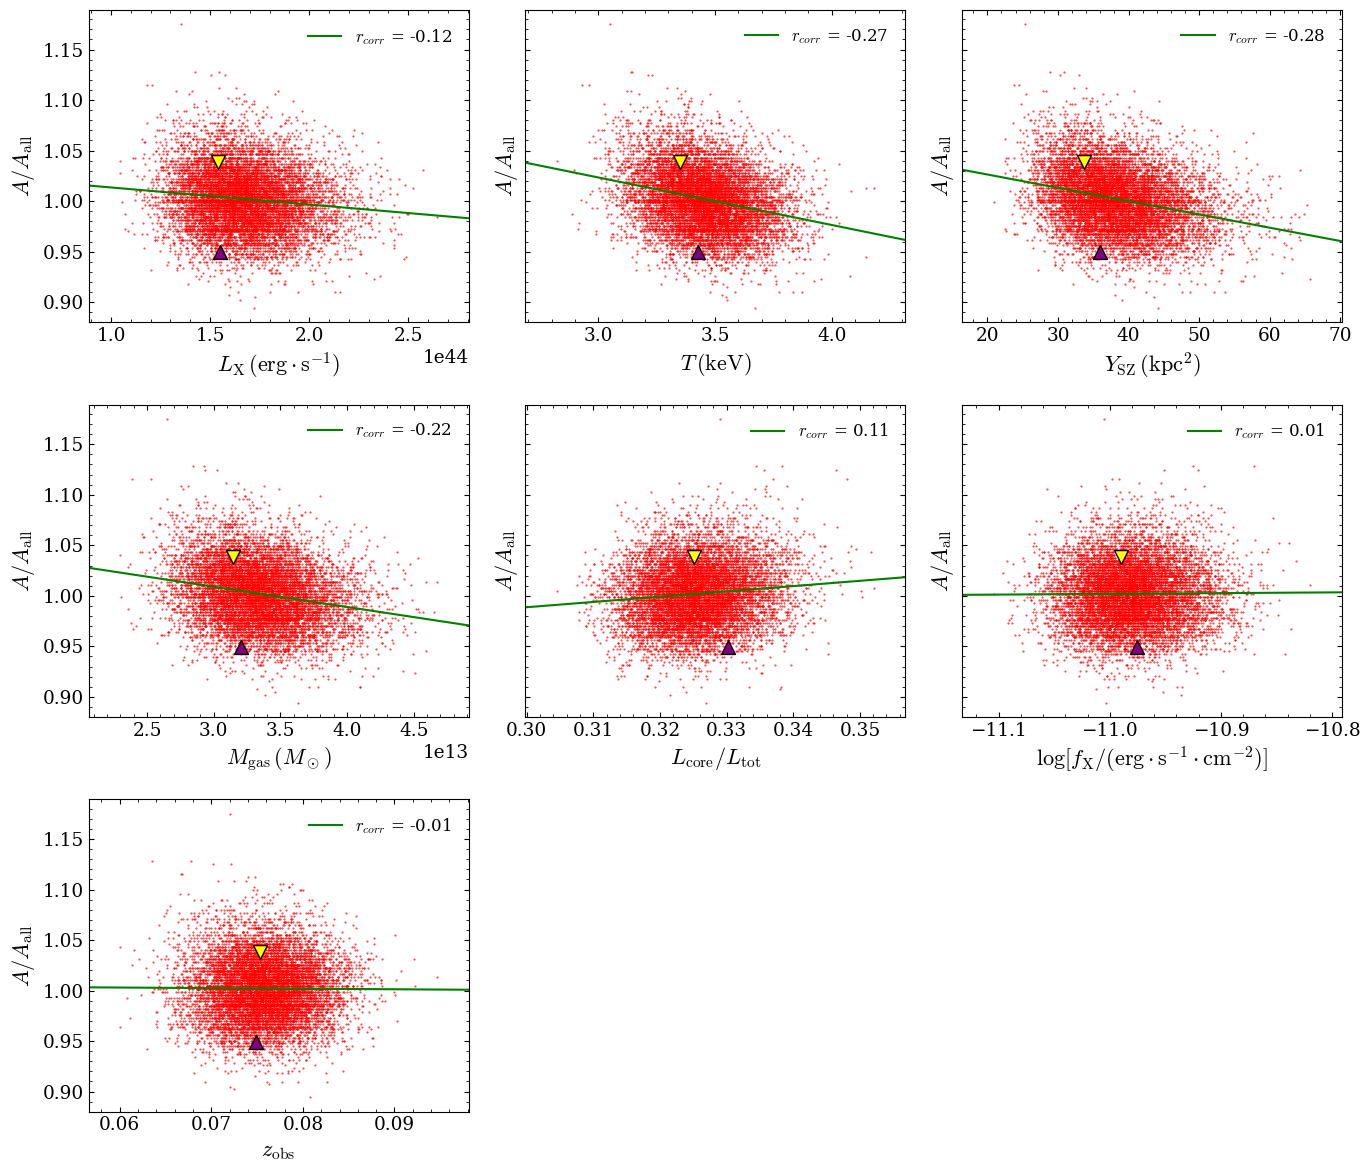

YSZ-T : direction (-68, 20), opposite (112, -20)
A_all=1.064
pscat=[0.095]
nscat=[0.075]
LX positive dipole: 1.8505601549853535e+44, negative dipole: 2.0353361206519935e+44
T positive dipole: 3.6290354857616456, negative dipole: 3.5370214365753454
YSZ positive dipole: 45.1999092530842, negative dipole: 49.790674169383195
Mgas positive dipole: 37060571434693.875, negative dipole: 36741003049019.61
Lcore/Ltot positive dipole: 0.3287338312428045, negative dipole: 0.33160699526433884
logFlux positive dipole: -10.980518729823446, negative dipole: -10.961077296177733
ObservedRedshift positive dipole: 0.0813173454492977, negative dipole: 0.07342508387832995


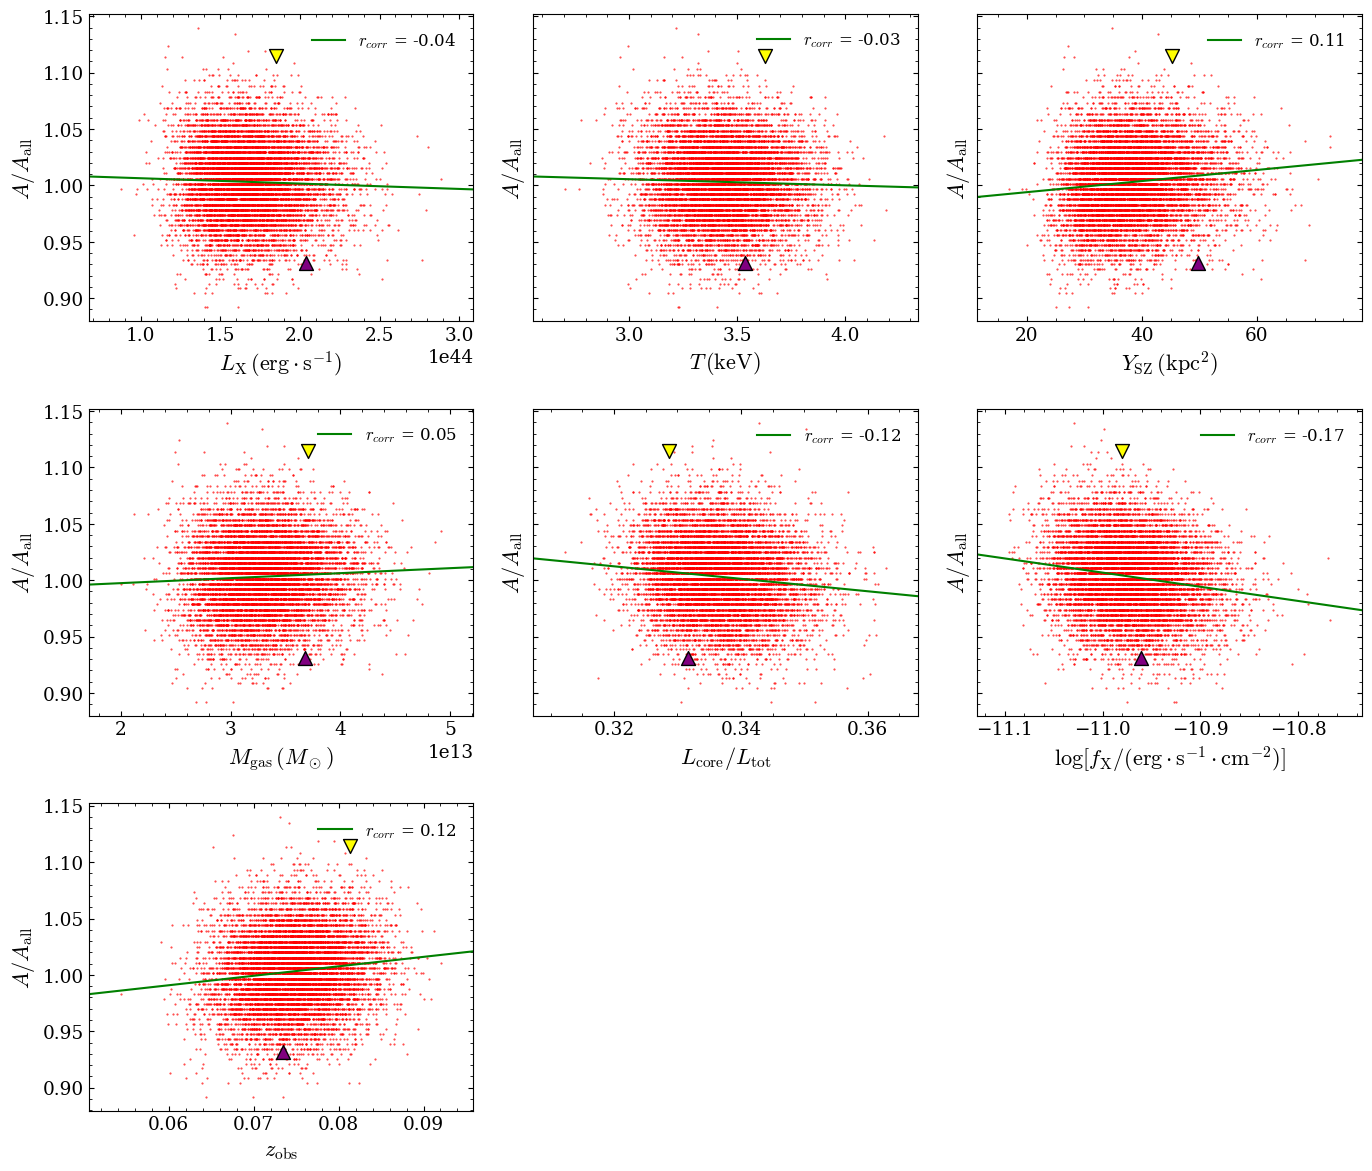

M-T : direction (-84, 12), opposite (96, -12)
A_all=1.079
pscat=[0.05]
nscat=[0.05]
LX positive dipole: 1.6784455330488853e+44, negative dipole: 1.796334150325507e+44
T positive dipole: 3.496555573383434, negative dipole: 3.487800030338063
YSZ positive dipole: 38.544904872880494, negative dipole: 43.37588889897047
Mgas positive dipole: 33854099305434.78, negative dipole: 34962549659803.92
Lcore/Ltot positive dipole: 0.3244280287265518, negative dipole: 0.32608952345741743
logFlux positive dipole: -10.937518370303824, negative dipole: -10.96503065597717
ObservedRedshift positive dipole: 0.07433817948967426, negative dipole: 0.07416692031373374


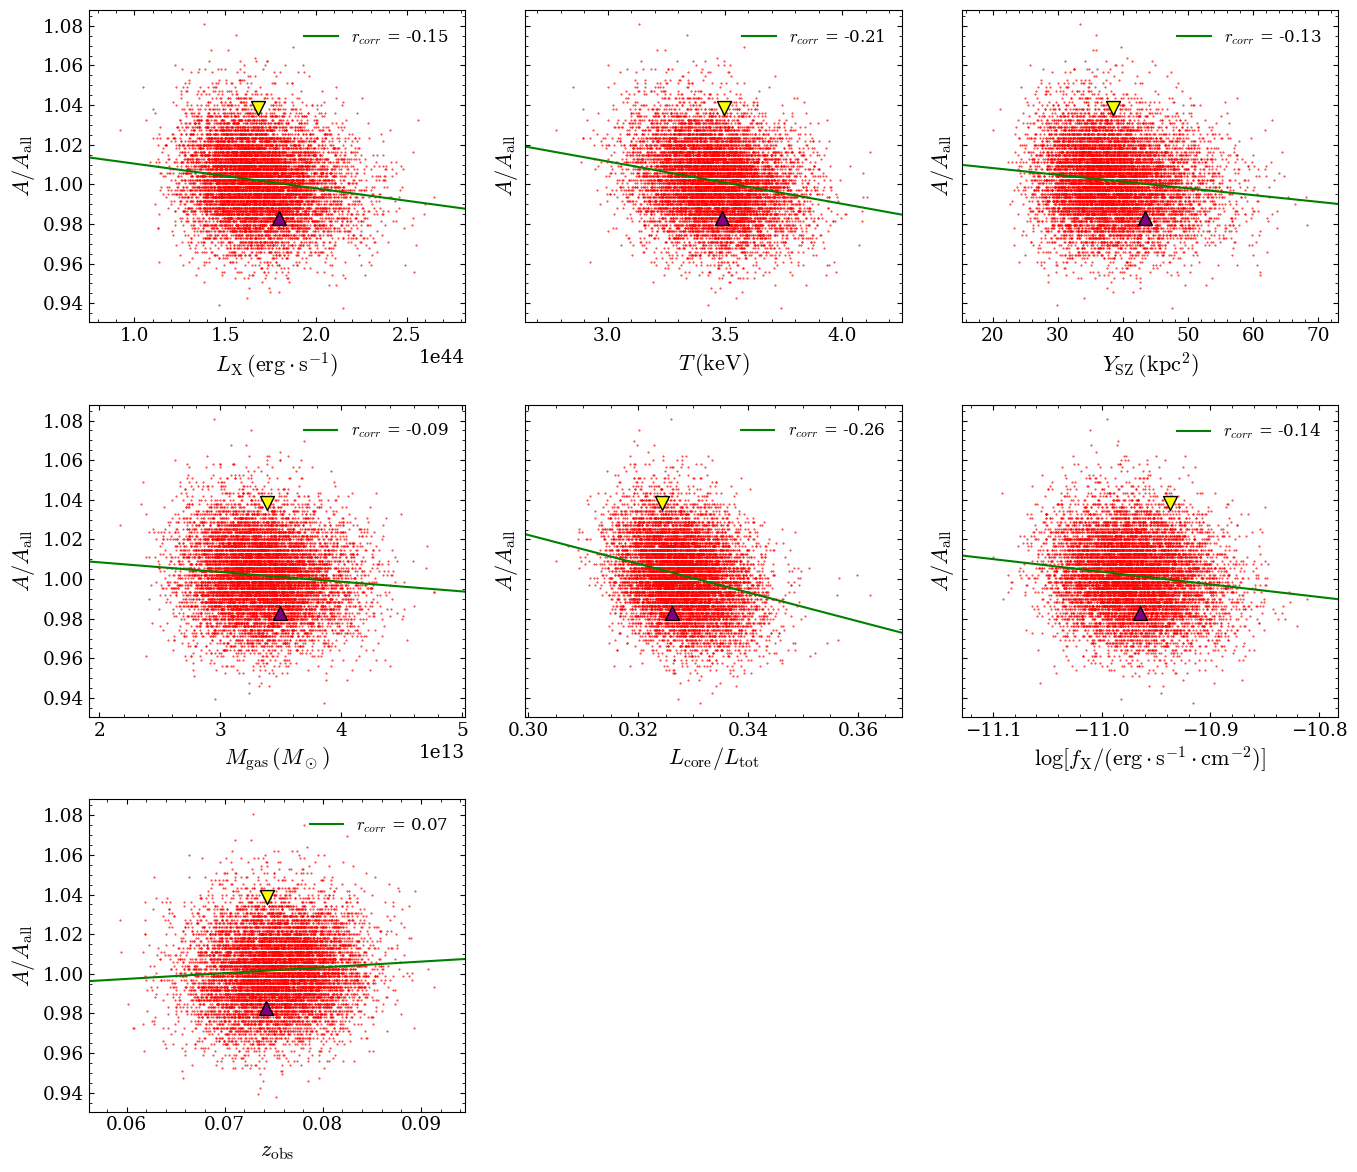

LX-T : direction (128, -22), opposite (-52, 22)
A_all=1.542
pscat=[0.095]
nscat=[0.075]
LX positive dipole: 1.7087205326005042e+44, negative dipole: 1.4578777339029903e+44
T positive dipole: 3.451739677808043, negative dipole: 3.3195836343440415
YSZ positive dipole: 36.820704749774364, negative dipole: 33.02893761491072
Mgas positive dipole: 33395867001709.402, negative dipole: 30690277981415.93
Lcore/Ltot positive dipole: 0.23867800930532604, negative dipole: 0.24668262118123135
logFlux positive dipole: -10.970429881112235, negative dipole: -10.993166151943417
ObservedRedshift positive dipole: 0.07750152866845246, negative dipole: 0.07165585006983284


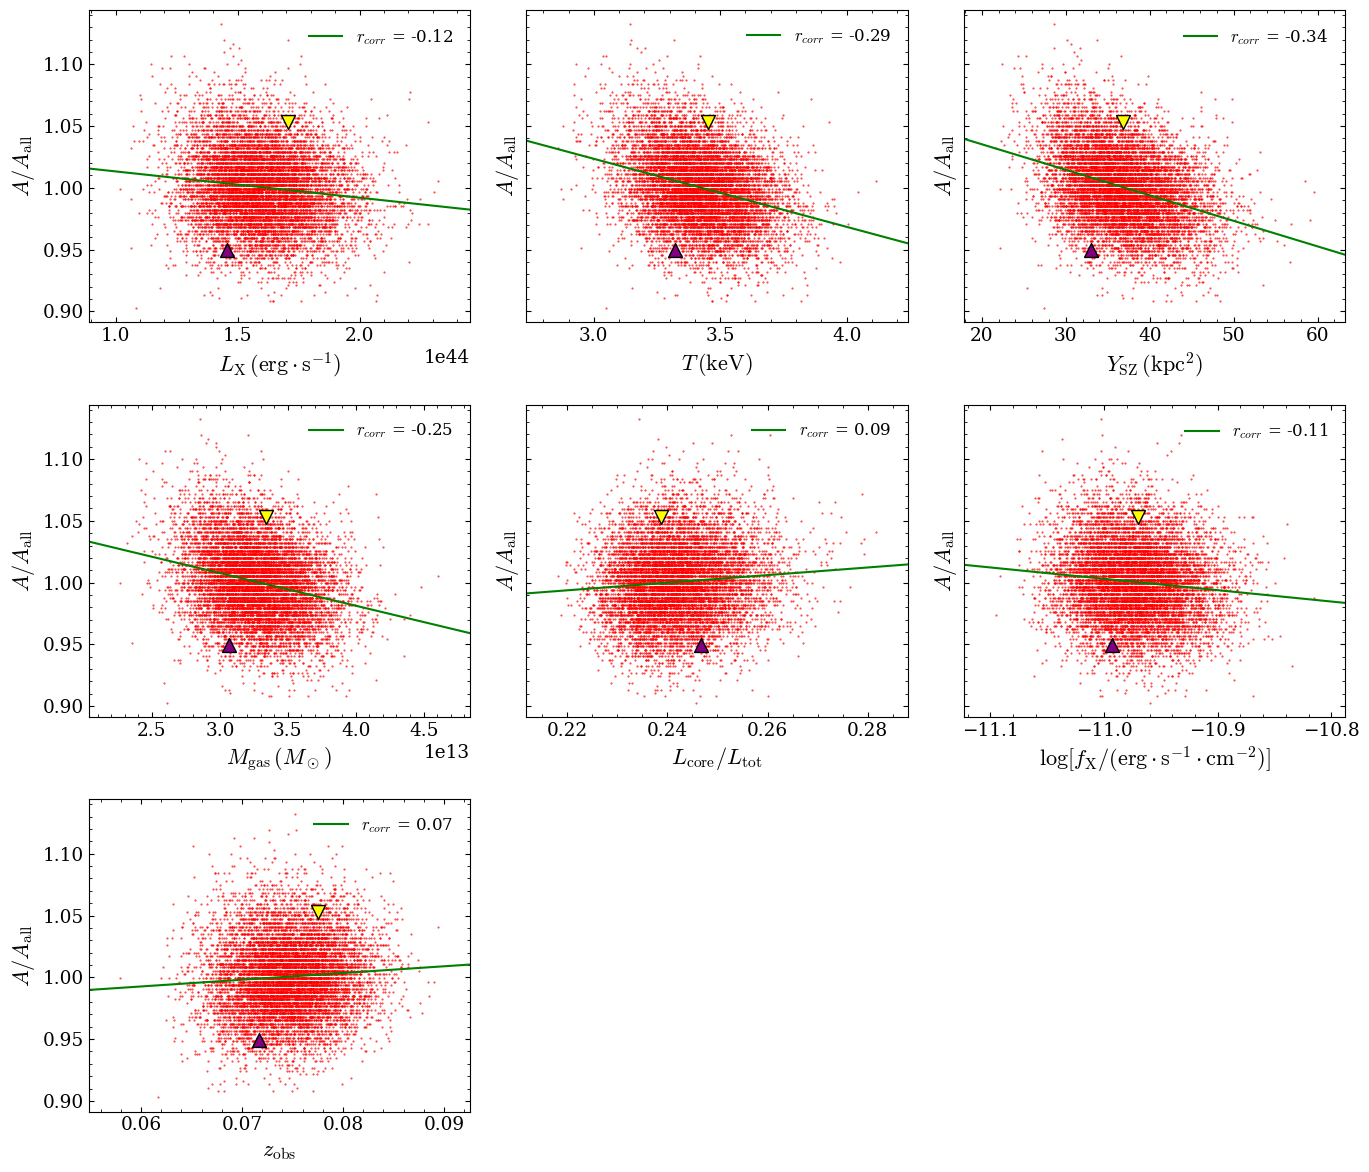

YSZ-T : direction (128, -4), opposite (-52, 4)
A_all=1.099
pscat=[0.07]
nscat=[0.06]
LX positive dipole: 1.8152444434466938e+44, negative dipole: 1.866279321192489e+44
T positive dipole: 3.581520056472224, negative dipole: 3.6862483538595012
YSZ positive dipole: 42.63899401630007, negative dipole: 45.35773996071527
Mgas positive dipole: 35616875375000.0, negative dipole: 37549134901785.71
Lcore/Ltot positive dipole: 0.2606470648370654, negative dipole: 0.25363867430789033
logFlux positive dipole: -10.96253257219251, negative dipole: -10.98372935796596
ObservedRedshift positive dipole: 0.0800117024391339, negative dipole: 0.07822994509373181


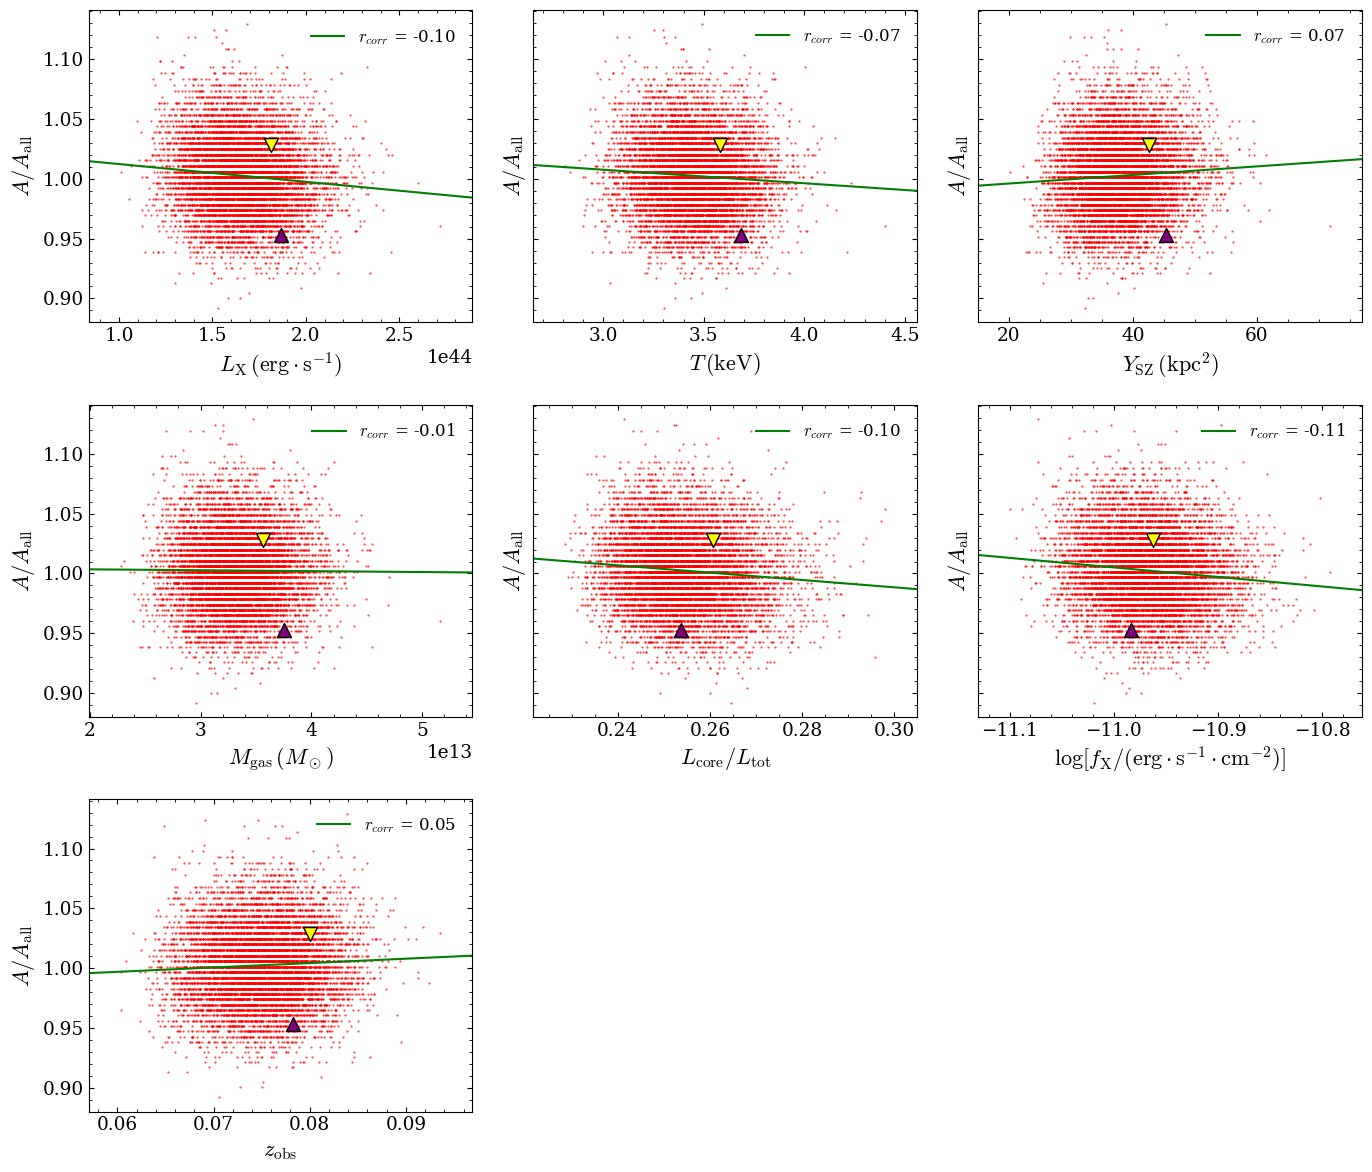

M-T : direction (124, -16), opposite (-56, 16)
A_all=1.094
pscat=[0.05]
nscat=[0.05]
LX positive dipole: 1.7045080703561057e+44, negative dipole: 1.5300442999387184e+44
T positive dipole: 3.4862671792194018, negative dipole: 3.385224019242904
YSZ positive dipole: 38.57246276107368, negative dipole: 35.83443070593261
Mgas positive dipole: 34051722613793.1, negative dipole: 32054874823809.523
Lcore/Ltot positive dipole: 0.24360680421675476, negative dipole: 0.2404437209948758
logFlux positive dipole: -10.959381180005535, negative dipole: -10.97085722784869
ObservedRedshift positive dipole: 0.07681970864436048, negative dipole: 0.07224138302300942


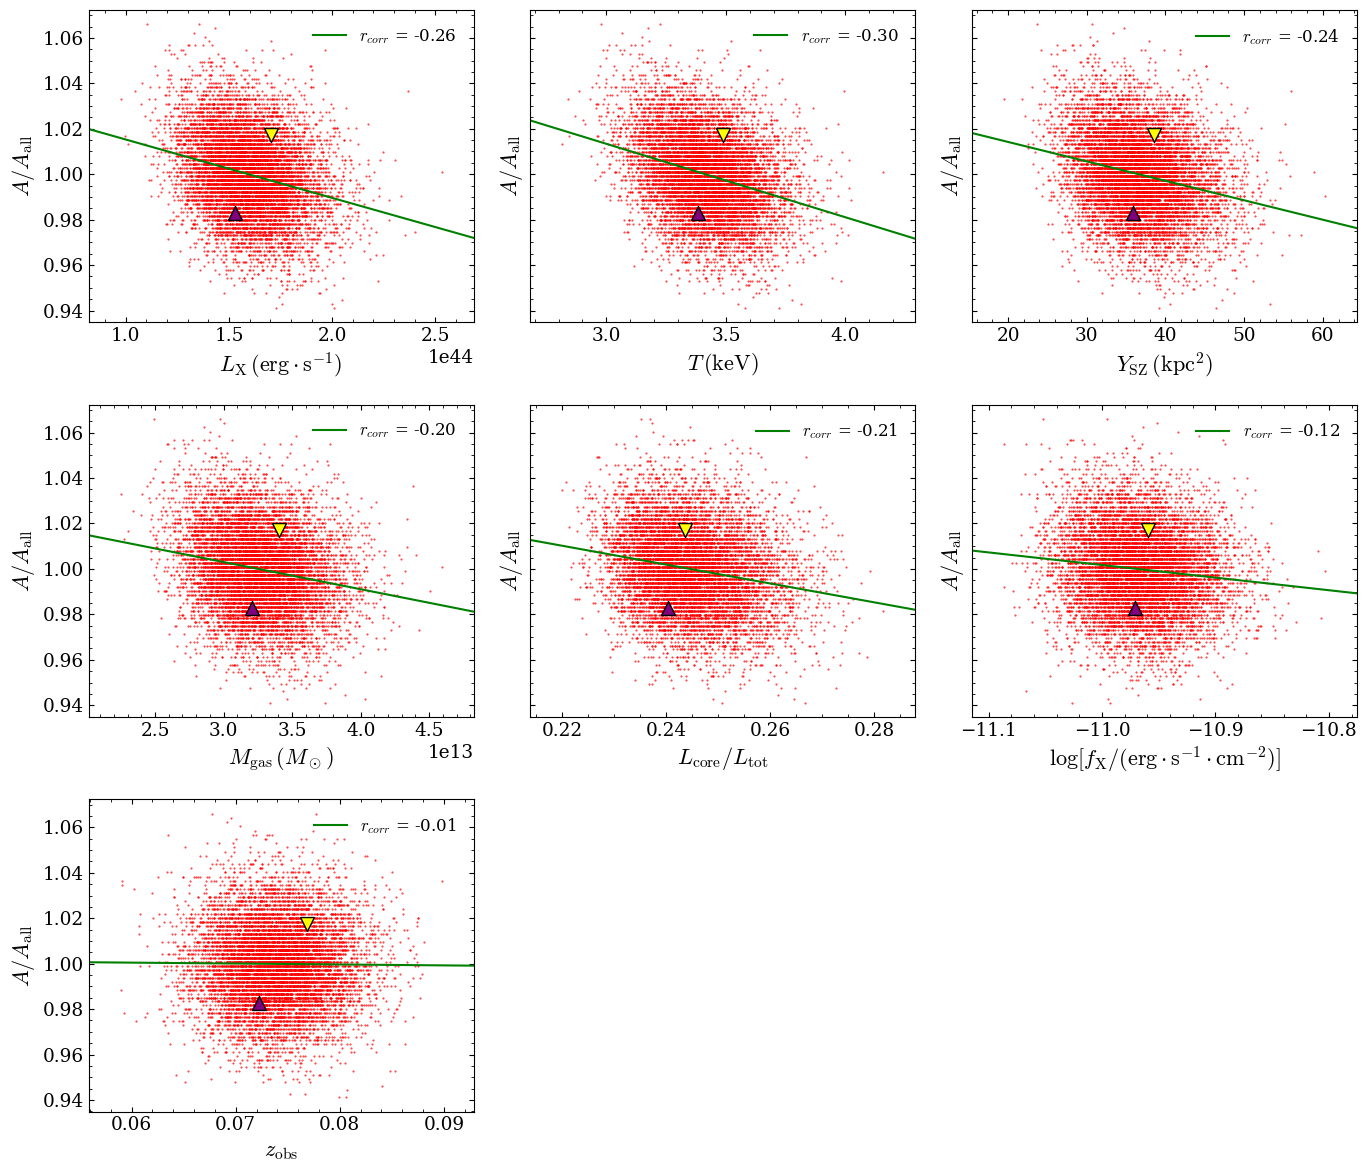

In [3]:
lc = 0
# relation = 'LX-T'

cone_sizes = [75, 60, 75]
suptitles = ['$L_\\mathrm{{X}}-T$', '$Y_\\mathrm{{SZ}}-T$', '$M_\\mathrm{{gas}}-T$']

for lc in [0, 1]:
    for j, relation in enumerate(['LX-T', 'YSZ-T', 'M-T']):
        n_clusters = cf.CONST[relation]['N'] # number of clusters for the sample
        cone_size = cone_sizes[j]            # Relation considered

        # Get the dipole direction
        df_dp = pd.read_csv(f'../scripts/H0-dipole-direction-lightcone{lc}.csv')
        maxlon = df_dp[df_dp['relation'] == relation]['lon'].values[0]
        maxlat = df_dp[df_dp['relation'] == relation]['lat'].values[0]
        minlon, minlat = cf.opposite_direction(maxlon, maxlat)
        print(f'{relation} : direction ({maxlon}, {maxlat}), opposite ({minlon}, {minlat})')

        # Get A_all for comparison
        df_bf = pd.read_csv(f'../scripts/fit-all-lightcone{lc}.csv')
        A_all = df_bf[df_bf['relation'] == relation]['A'].values[0]
        print(f'A_all={A_all}')

        # Get the best fit scatter and A of the max dipole
        df_bf_scan = pd.read_csv(f'../data/fits/testrun/lightcone{lc}/scan_best_fit_{relation}_θ{cone_size}.csv')
        mask = (df_bf_scan['Glon'] == maxlon) & (df_bf_scan['Glat'] == maxlat)
        pA = df_bf_scan[mask]['A'].values
        pscat = df_bf_scan[mask]['TotalScatter'].values
        print(f'pscat={pscat}')

        # The min dipole
        mask = (df_bf_scan['Glon'] == minlon) & (df_bf_scan['Glat'] == minlat)
        nA = df_bf_scan[mask]['A'].values
        nscat = df_bf_scan[mask]['TotalScatter'].values
        print(f'nscat={nscat}')

        # The main physical correlation data from bootstrapping
        data = pd.read_csv(f'../data/fits/testrun/lightcone{lc}/physical-properties-corr-{relation}-60deg-lc{lc}.csv')

        # Plot the dipole
        samples = pd.read_csv(f'../data/samples_in_lightcone{lc}_with_trees_duplicate_excision_outlier_excision.csv')
        dtheta = cf.angular_separation(samples['phi_on_lc'].values, samples['theta_on_lc'].values, maxlon, maxlat)
        p_dipoles = samples[:n_clusters][dtheta[:n_clusters] < cone_size]
        n_dipoles = samples[:n_clusters][dtheta[:n_clusters] > (180 - cone_size)]

        # Create figure, share y axis
        fig, ax = plt.subplots(3, 3, figsize=(14, 12), sharey=True)
        # fig.suptitle(suptitles[j]) # better to use subcaption in latex than suptitle here
        # fig.subplots_adjust(top=0.95, hspace=0.3, wspace=0.3)

        idx = 0
        keys = ['LX', 'T', 'YSZ', 'Mgas', 'Lcore/Ltot', 'logFlux', 'ObservedRedshift'] # 'scat', the physical coor somehow has a smaller scatter than other fits
        labels = ['$L_\\mathrm{{X}}\,\\mathrm{{(erg \\cdot s^{{-1}})}}$',
                  '$T \\,\\mathrm{{(keV)}}$', 
                  '$Y_\\mathrm{{SZ}}\\, \\mathrm{{(kpc^2)}}$',
                  '$M_\\mathrm{{gas}}\\,(M_\\odot)$', 
                  '$L_\\mathrm{{core}}/L_\\mathrm{{tot}}$',
                  '$\\log [f_\\mathrm{{X}}/(\\mathrm{{erg\\cdot s^{{-1}} \\cdot cm^{{-2}}}})]$', 
                  '$z_\\mathrm{{obs}}$']
        for row in ax:
            for subax in row:
                if idx >= len(keys):
                    fig.delaxes(subax)
                else:
                    # Plot the whole sky
                    Y = 10**data['logA']/A_all
                    X = data[keys[idx]]
                    subax.scatter(X, Y, marker='.', color='r', s=1, alpha=0.8, linewidths=1)

                    # The dipole
                    py = pA/A_all
                    ny = nA/A_all
                    sample_key = sample_key_name(keys[idx])
                    if keys[idx] == 'scat':
                        px = pscat
                        nx = nscat
                    elif keys[idx] == 'logFlux':
                        px = np.mean(np.log10(p_dipoles['Flux']))
                        nx = np.mean(np.log10(n_dipoles['Flux']))
                    elif keys[idx] == 'Lcore/Ltot':
                        string = '2DLcore/Ltot' if lc == 0 else '3DLcore/Ltot'
                        px = np.mean(np.mean(p_dipoles[string]))
                        nx = np.mean(np.mean(n_dipoles[string]))
                    else:
                        px = np.mean(p_dipoles[sample_key])
                        nx = np.mean(n_dipoles[sample_key])
                    subax.scatter(px, py, marker='v', color='yellow', s=100, edgecolors='black')
                    subax.scatter(nx, ny, marker='^', color='purple', s=100, edgecolors='black')
                    print(keys[idx], f'positive dipole: {px}, negative dipole: {nx}' )

                    # fit a line
                    xmin = np.min(np.append(X, [px, nx]))
                    xmax = np.max(np.append(X, [px, nx]))
                    xlen = xmax - xmin
                    x = np.linspace(xmin - 0.1*xlen, xmax + 0.1*xlen, 100)

                    m, b = np.polyfit(X, Y, 1)
                    subax.plot(x, m*x + b, color='g', label='$r_{{corr}}$ = {:.2f}'.format(np.corrcoef(X, Y)[0,1]))
                    subax.set_xlim(xmin - 0.1*xlen, xmax + 0.1*xlen)

                    subax.legend(loc='upper right')
                    subax.set_xlabel(labels[idx])
                    subax.set_ylabel('$A/A_\\mathrm{all}$')

                idx += 1
        plt.tight_layout()
        plt.savefig(f'/Users/yujiehe/Documents/projects/project-anisotropy/plots/forpaper/discuss-physical-properties-corr-{relation}-{cone_size}deg-lc{lc}.png', dpi=200, bbox_inches='tight')
        plt.show()